# Demonstrando as LSTMs em sequências muito grandes

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Construindo o dataset
# Esse é um problema não-linear E um long-distance dataset.

# 30 timesteps na sequência
T = 30
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0


for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2)
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)
N = len(X)

In [3]:
# LSTM com GlobalMaxPooling!
inputs = np.expand_dims(X, -1)


# Construindo o modelo
i = Input(shape=(T, D))
x = LSTM(5, return_sequences=True)(i) # O Parâmetro "return_sequences=True" traz como retorno dessa layer os dois
                                      # valores respectivos à hidden layer: h(t) e c(t). Isso deixa a nossa LSTM
                                      # mais poderosa, pois temos acesso à todos os valores do nosso hidden state.
    
x = GlobalMaxPool1D()(x) # Como nas CNNs, podemos reduzir o output de duas dimensões que foi trazido pela layer acima
                         # usando um GlobalMaxPooling, nesse caso, de 1D (Para as CNNs, nosso retorno era H x W x C.
                         # No caso das RNNs, nosso retorno é T x M, devido ao return_sequences=True).
        
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])


# Treinando o modelo
historico = model.fit(inputs, Y, epochs=100, validation_split=0.5)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 18s 7ms/sample - loss: 0.6951 - accuracy: 0.4832 - val_loss: 0.6944 - val_accuracy: 0.5060
Epoch 2/100
2500/2500 [==============================] - 2s 894us/sample - loss: 0.6941 - accuracy: 0.4912 - val_loss: 0.6941 - val_accuracy: 0.5020
Epoch 3/100
2500/2500 [==============================] - 2s 909us/sample - loss: 0.6938 - accuracy: 0.5088 - val_loss: 0.6940 - val_accuracy: 0.5084
Epoch 4/100
2500/2500 [==============================] - 2s 922us/sample - loss: 0.6938 - accuracy: 0.4932 - val_loss: 0.6952 - val_accuracy: 0.5056
Epoch 5/100
2500/2500 [==============================] - 2s 906us/sample - loss: 0.6928 - accuracy: 0.5060 - val_loss: 0.6931 - val_accuracy: 0.5108
Epoch 6/100
2500/2500 [==============================] - 2s 909us/sample - loss: 0.6925 - accuracy: 0.5236 - val_loss: 0.6963 - val_accuracy: 0.4944
Epoch 7/100
2500/2500 [==============================] - 2s

2500/2500 [==============================] - 2s 890us/sample - loss: 0.0906 - accuracy: 0.9748 - val_loss: 0.0930 - val_accuracy: 0.9716
Epoch 56/100
2500/2500 [==============================] - 2s 936us/sample - loss: 0.0953 - accuracy: 0.9724 - val_loss: 0.0902 - val_accuracy: 0.9740
Epoch 57/100
2500/2500 [==============================] - 2s 901us/sample - loss: 0.0889 - accuracy: 0.9736 - val_loss: 0.0855 - val_accuracy: 0.9756
Epoch 58/100
2500/2500 [==============================] - 2s 909us/sample - loss: 0.0799 - accuracy: 0.9768 - val_loss: 0.0805 - val_accuracy: 0.9756
Epoch 59/100
2500/2500 [==============================] - 2s 902us/sample - loss: 0.0709 - accuracy: 0.9784 - val_loss: 0.0722 - val_accuracy: 0.9808
Epoch 60/100
2500/2500 [==============================] - 2s 919us/sample - loss: 0.0705 - accuracy: 0.9784 - val_loss: 0.0984 - val_accuracy: 0.9744
Epoch 61/100
2500/2500 [==============================] - 2s 898us/sample - loss: 0.0708 - accuracy: 0.9768 - val

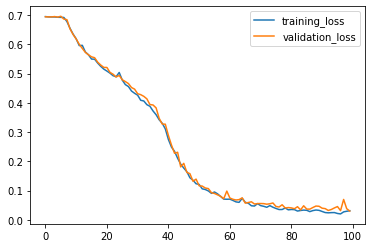

In [4]:
# Plotando a loss
plt.plot(historico.history['loss'], label='training_loss')
plt.plot(historico.history['val_loss'], label='validation_loss')
plt.legend()

# Resultados bons, parece que convergiu.

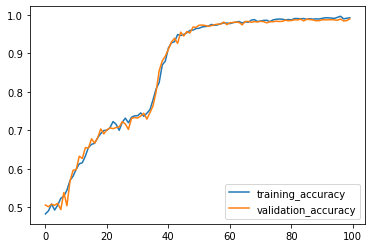

In [5]:
# Plotando a accuracy
plt.plot(historico.history['accuracy'], label='training_accuracy')
plt.plot(historico.history['val_accuracy'], label='validation_accuracy')
plt.legend()

# Resultados muito bons também.